In [1]:
%matplotlib inline
import os, re
import sys
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import glob
import scipy

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Paths to un-obfuscated samples
SMTPD_CLIENT_SAMPLES = './samples/smtpd'
FETCHMAIL_SERVER_SAMPLES = './samples/fetchmail-server'
FETCHMAIL_GMX_SAMPLES = './samples/fetchmail-gmx'
DOVECOT_SAMPLES = './samples/imap-login'
OTHER_SAMPLES = './samples/others'

# Paths to obfuscated samples (added sleep between every 2 system calls)
OBFUSCATED_SMTPD_SAMPLES = './samples/smtpd-obf'
OBFUSCATED_FETCHMAIL_SERVER_SAMPLES = './samples/fetchmail-server-obf'
OBFUSCATED_FETCHMAIL_GMX_SAMPLES = './samples/fetchmail-gmx-obf'
OBFUSCATED_DOVECOT_SAMPLES = './samples/imap-login-obf'


COLUMN_NAMES=['syscall serial num','timestamp','??','process name','pid','direction','action','arguments']

def get_merged_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], ignore_index=True)

def create_samples_dict(path, sample_type):
    """
    This method recieves a path to a folder and a sample type indicating a string that appears
    in each of the file names and returns a dictionary in which every key represents a file,
    and every value is the data of that csv file.
    """
    fmask = os.path.join(path, '*{}*.csv'.format(sample_type))
    FILE_LIST = glob.glob(fmask)


    nameList = []
    for path in FILE_LIST:
        name = path.split('/')[-1].split('.')[0]
        nameList.append(name)


    dataDct = {}
    for k, v in zip(nameList, FILE_LIST):
        #print >> sys.stderr, v # for debug purpose 
        dataDct[k] = pd.read_csv(v,sep=',', error_bad_lines=False, header=None)
        dataDct[k] = dataDct[k].drop(dataDct[k].columns[0:2], axis=1)
        dataDct[k] = dataDct[k].rename(columns=dict(zip(dataDct[k].columns, COLUMN_NAMES)))
        dataDct[k] = dataDct[k].loc[dataDct[k]['direction'] == '>']
    return dataDct


In [3]:
smtpd_samples = create_samples_dict(SMTPD_CLIENT_SAMPLES,'smtpd')
fetchmail_server_samples = create_samples_dict(FETCHMAIL_SERVER_SAMPLES, 'server')
fetchmail_gmx_samples = create_samples_dict(FETCHMAIL_GMX_SAMPLES, 'gmx')
dovecot_samples = create_samples_dict(DOVECOT_SAMPLES, 'imap')
other_samples = create_samples_dict(OTHER_SAMPLES, 'other')

obfuscated_smtpd_samples = create_samples_dict(OBFUSCATED_SMTPD_SAMPLES, 'smtpd')
obfuscated_fetchmail_server_samples = create_samples_dict(OBFUSCATED_FETCHMAIL_SERVER_SAMPLES, 'server')
obfuscated_fetchmail_gmx_samples = create_samples_dict(OBFUSCATED_FETCHMAIL_GMX_SAMPLES, 'gmx')
obfuscated_dovecot_samples = create_samples_dict(OBFUSCATED_DOVECOT_SAMPLES, 'imap')


In [4]:
# an example data frame:
obfuscated_smtpd_samples['smtpd_server4_11']

,syscall serial num,timestamp,??,process name,pid,direction,action,arguments
0,1094067,08:11:23.085805696,0,smtpd,(26541),>,poll,fds=10:41 timeout=300000 ...
2,1094067,08:11:23.085805696,0,smtpd,(26541),>,nanosleep,interval=1000000000(1s)
4,1094085,08:11:23.085837700,0,smtpd,(26541),>,read,fd=10(<4t>172.18.0.3:39805->172.18.0.2:25) siz...
6,1094085,08:11:23.085837700,0,smtpd,(26541),>,nanosleep,interval=1000000000(1s)
8,1094087,08:11:23.085855229,0,smtpd,(26541),>,poll,fds=12:44 timeout=30000 ...
10,1094087,08:11:23.085855229,0,smtpd,(26541),>,nanosleep,interval=1000000000(1s)
12,1094089,08:11:23.085856133,0,smtpd,(26541),>,write,fd=12(<4t>127.0.0.1:40455->127.0.0.1:8891) siz...
14,1094089,08:11:23.085856133,0,smtpd,(26541),>,nanosleep,interval=1000000000(1s)
16,1094091,08:11:23.085862132,0,smtpd,(26541),>,poll,fds=12:41 timeout=30000 ...
18,1094091,08:11:23.085862132,0,smtpd,(26541),>,nanosleep,interval=1000000000(1s)


In [5]:
def print_sample_size(sample_dictionary):
    for key,sample in sample_dictionary.iteritems():
        print 'sample {} contains {} system calls'.format(key,len(sample))
    print '\n'
# validate sample length (we expect the regular and obfuscated samples
# to be approximatly the same length:
sample_list = [smtpd_samples, obfuscated_smtpd_samples, 
               dovecot_samples, obfuscated_dovecot_samples]    

for item in sample_list:
    print_sample_size(item)

sample smtpd_server4_279 contains 179 system calls
sample smtpd_server4_278 contains 104 system calls
sample smtpd_server4_67 contains 89 system calls
sample smtpd_server4_66 contains 121 system calls
sample smtpd_server4_65 contains 41 system calls
sample smtpd_server4_64 contains 79 system calls
sample smtpd_server4_63 contains 165 system calls
sample smtpd_server4_62 contains 75 system calls
sample smtpd_server4_61 contains 81 system calls
sample smtpd_server4_60 contains 128 system calls
sample smtpd_server4_69 contains 41 system calls
sample smtpd_server4_68 contains 41 system calls
sample smtpd_server4_437 contains 45 system calls
sample smtpd_server4_428 contains 41 system calls
sample smtpd_server4_429 contains 41 system calls
sample smtpd_server4_424 contains 45 system calls
sample smtpd_server4_425 contains 41 system calls
sample smtpd_server4_426 contains 45 system calls
sample smtpd_server4_427 contains 41 system calls
sample smtpd_server4_420 contains 61 system calls
sampl

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(stop_words=None,ngram_range=(2,2), analyzer='word', max_features=100)

In [7]:
# we want to create a unified corpus from all of the samples
def merge_data_frames(samples_dict_list):
    """
    This method recieves a list of samples dictionaries and returns a concatenated data frame
    that contains all of the samples.
    """
    merged_list = []
    for samples_dict in samples_dict_list:
        [merged_list.append(value) for key, value in samples_dict.items()]
    merged_dict = pd.concat(merged_list)
    return merged_dict

merged_samples = merge_data_frames([smtpd_samples, dovecot_samples, fetchmail_server_samples,
                                    fetchmail_gmx_samples, other_samples])

In [8]:
word_vectorizer.fit([merged_samples['action'].str.cat(sep=' ')])

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
word_vectorizer.vocabulary_

{u'access mmap': 0,
 u'access open': 1,
 u'alarm epoll_wait': 2,
 u'arch_prctl mprotect': 3,
 u'brk access': 4,
 u'brk brk': 5,
 u'clone close': 6,
 u'close access': 7,
 u'close close': 8,
 u'close dup': 9,
 u'close fcntl': 10,
 u'close mmap': 11,
 u'close open': 12,
 u'close poll': 13,
 u'close socket': 14,
 u'close stat': 15,
 u'close wait4': 16,
 u'close write': 17,
 u'connect close': 18,
 u'connect poll': 19,
 u'dup close': 20,
 u'epoll_ctl alarm': 21,
 u'epoll_wait ioctl': 22,
 u'epoll_wait read': 23,
 u'exit_group procexit': 24,
 u'fcntl connect': 25,
 u'fcntl fcntl': 26,
 u'flock fcntl': 27,
 u'fstat fstat': 28,
 u'fstat mmap': 29,
 u'fstat read': 30,
 u'fstat stat': 31,
 u'geteuid getuid': 32,
 u'getuid getgid': 33,
 u'ioctl poll': 34,
 u'ioctl write': 35,
 u'lseek fstat': 36,
 u'lseek read': 37,
 u'lstat open': 38,
 u'mmap access': 39,
 u'mmap arch_prctl': 40,
 u'mmap close': 41,
 u'mmap lseek': 42,
 u'mmap mmap': 43,
 u'mmap mprotect': 44,
 u'mprotect mmap': 45,
 u'mprotect m

In [10]:
def vectorize(samples_dict):
    vectorized_dict = {}
    for key,sample in samples_dict.iteritems():
        vectorized_dict[key] = word_vectorizer.transform([samples_dict[key]['action'].str.cat(sep=' ')])
    return vectorized_dict

In [11]:
# now we transform each sample dictionary into a bigram vector
smtpd_bigrams = vectorize(smtpd_samples)
dovecot_bigrams = vectorize(dovecot_samples)
fetchmail_server_bigrams = vectorize(fetchmail_server_samples)
fetchmail_gmx_bigrams = vectorize(fetchmail_gmx_samples)
other_bigrams = vectorize(other_samples)

# and do the same for the obfuscated samples
obfuscated_smtpd_bigrams = vectorize(obfuscated_smtpd_samples)
obfuscated_fetchmail_server_bigrams = vectorize(obfuscated_fetchmail_server_samples)
obfuscated_fetchmail_gmx_bigrams = vectorize(obfuscated_fetchmail_gmx_samples)
obfuscated_dovecot_bigrams = vectorize(obfuscated_dovecot_samples)


In [12]:
dovecot_bigrams['imap_login2_0']

<1x100 sparse matrix of type '<type 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [13]:
obfuscated_smtpd_bigrams['smtpd_server4_11'].todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [14]:
smtpd_bigrams['smtpd_client3_140'].todense()

matrix([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
          0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  2, 19, 18,  0,  1,  0,  0,  0,  0, 13,  0,  0,
          0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  1,  1,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0]])

In [15]:
def scale(x):
    if np.sum(x) != 0:
        return x / np.sum(x)
    else:
        return x

In [16]:
def scale_dict(samples_dict):
    for key, _ in samples_dict.iteritems():
        samples_dict[key].dtype = float
        samples_dict[key] = scale(samples_dict[key].todense())
        samples_dict[key] = scipy.sparse.csr_matrix(samples_dict[key])
    return samples_dict

In [17]:
smtpd_bigrams = scale_dict(smtpd_bigrams)
dovecot_bigrams = scale_dict(dovecot_bigrams)
fetchmail_server_bigrams = scale_dict(fetchmail_server_bigrams)
fetchmail_gmx_bigrams = scale_dict(fetchmail_gmx_bigrams)
other_bigrams = scale_dict(other_bigrams)

obfuscated_smtpd_bigrams = scale_dict(obfuscated_smtpd_bigrams)
obfuscated_fetchmail_server_bigrams = scale_dict(obfuscated_fetchmail_server_bigrams)
obfuscated_fetchmail_gmx_bigrams = scale_dict(obfuscated_fetchmail_gmx_bigrams)
obfuscated_dovecot_bigrams = scale_dict(obfuscated_dovecot_bigrams)

In [18]:
smtpd_bigrams['smtpd_client3_140'].data
#scipy.sparse.csr_matrix(a)

array([ 0.025 ,  0.0125,  0.0125,  0.0125,  0.0125,  0.025 ,  0.2375,
        0.225 ,  0.0125,  0.1625,  0.025 ,  0.0125,  0.0125,  0.2125])

In [19]:
def merge_vectorized(s_dict):
    merged_list = []
    [merged_list.append(value) for key, value in s_dict.items()]
    
    return merged_list

In [20]:
# now we merge the different bigram vectors of each type into one list so we can later 
# do the train/test split:
merged_vectorized_smtpd_samples = merge_vectorized(smtpd_bigrams)
merged_vectorized_dovecot_samples = merge_vectorized(dovecot_bigrams)
merged_vectorized_fetchmail_server_samples = merge_vectorized(fetchmail_server_bigrams)
merged_vectorized_fetchmail_gmx_samples = merge_vectorized(fetchmail_gmx_bigrams)
merged_vectorized_other_samples = merge_vectorized(other_bigrams)

# and the same for the obfuscated samples:
merged_vectorized_obfuscated_smtpd_samples = merge_vectorized(obfuscated_smtpd_bigrams)
merged_vectorized_obfuscated_fetchmail_server_samples = merge_vectorized(obfuscated_fetchmail_server_bigrams) 
merged_vectorized_obfuscated_fetchmail_gmx_samples = merge_vectorized(obfuscated_fetchmail_gmx_bigrams)
merged_vectorized_obfuscated_dovecot_samples = merge_vectorized(obfuscated_dovecot_bigrams)

In [21]:
def train_test_split(vectorized_samples_list):
    ratio = len(vectorized_samples_list)/3
    return vectorized_samples_list[:ratio], vectorized_samples_list[ratio:]

In [22]:
# perform train/test split
test_smtpd, train_smtpd = train_test_split(merged_vectorized_smtpd_samples)
test_dovecot, train_dovecot = train_test_split(merged_vectorized_dovecot_samples)
test_fetchmail_server, train_fetchmail_server = train_test_split(merged_vectorized_fetchmail_server_samples)
test_fetchmail_gmx, train_fetchmail_gmx = train_test_split(merged_vectorized_fetchmail_gmx_samples)
test_other, train_other = train_test_split(merged_vectorized_other_samples)

#and the same for the obfuscated samples:
test_obfuscated_smtpd, train_obfuscated_smtpd = train_test_split(merged_vectorized_obfuscated_smtpd_samples)
test_obfuscated_dovecot, train_obfuscated_dovecot = train_test_split(merged_vectorized_obfuscated_dovecot_samples)
test_obfuscated_fetchmail_server, train_obfuscated_fetchmail_server = train_test_split(merged_vectorized_obfuscated_fetchmail_server_samples)
test_obfuscated_fetchmail_gmx, train_obfuscated_fetchmail_gmx = train_test_split(merged_vectorized_obfuscated_fetchmail_gmx_samples)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import vstack

clf = RandomForestClassifier()

x_train = vstack(train_smtpd + train_dovecot + train_fetchmail_server + train_fetchmail_gmx + train_other)
y_train = [0]*len(train_smtpd) + [1]*len(train_dovecot) + [2]*len(train_fetchmail_server) \
        + [3]*len(train_fetchmail_gmx)+ [4]*len(train_other)

x_test = vstack(test_smtpd + test_dovecot + test_fetchmail_server + test_fetchmail_gmx + test_other)
y_test = [0]*len(test_smtpd) + [1]*len(test_dovecot) + [2]*len(test_fetchmail_server) \
        + [3]* len(test_fetchmail_gmx)+ [4]*len(test_other)

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
y_predicted = clf.predict(x_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_predicted)

0.98630136986301364

In [26]:
cnf_matrix = confusion_matrix(y_test, y_predicted)

In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[146   0   0   0   0]
 [  0 146   0   0   0]
 [  0   0 146   0   0]
 [  0   0   0 146   0]
 [ 10   0   0   0 136]]


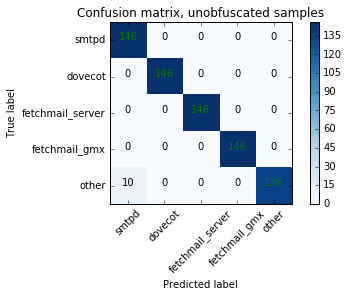

In [28]:

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['smtpd','dovecot','fetchmail_server','fetchmail_gmx','other'],
                      title='Confusion matrix, unobfuscated samples')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['smtpd','dovecot','fetchmail','other'], normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

In [29]:
#  we merge the different bigram vectors of each type into one list for the obfuscated data
merged_vectorized_obfuscated_smtpd_samples = merge_vectorized(obfuscated_smtpd_bigrams)
merged_vectorized_obfuscated_fetchmail_server_samples = merge_vectorized(obfuscated_fetchmail_server_bigrams)
merged_vectorized_obfuscated_fetchmail_gmx_samples = merge_vectorized(obfuscated_fetchmail_gmx_bigrams)
merged_vectorized_obfuscated_dovecot_samples = merge_vectorized(obfuscated_dovecot_bigrams)

In [30]:
# now we expect that the model will fail, we will test it for each class.
# the first example is obfuscated smtpd
len_obfuscated_smtpd_labels = len(merged_vectorized_obfuscated_smtpd_samples)
obfuscated_smtpd_labels =  [0]*len_obfuscated_smtpd_labels
obfuscation_predication = clf.predict(vstack(merged_vectorized_obfuscated_smtpd_samples))
obfuscation_predication

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4,

#### as we can see all of the samples are wrongly classified as 'other'

In [31]:
accuracy_score(obfuscation_predication, obfuscated_smtpd_labels)

0.0

#### we will do the same for all of the other classes:

In [32]:
# for fetchmail_server:
len_obfuscated_fetchmail_server_labels = len(merged_vectorized_obfuscated_fetchmail_server_samples)
obfuscated_fetchmail_server_labels =  [0]*len_obfuscated_fetchmail_server_labels
obfuscation_predication = clf.predict(vstack(merged_vectorized_obfuscated_fetchmail_server_samples))
accuracy_score(obfuscation_predication, obfuscated_fetchmail_server_labels)

0.0

In [33]:
# for fetchmail_gmx:
len_obfuscated_fetchmail_gmx_labels = len(merged_vectorized_obfuscated_fetchmail_gmx_samples)
obfuscated_fetchmail_gmx_labels =  [0]*len_obfuscated_fetchmail_gmx_labels
obfuscation_predication = clf.predict(vstack(merged_vectorized_obfuscated_fetchmail_gmx_samples))
accuracy_score(obfuscation_predication, obfuscated_fetchmail_gmx_labels)

0.0

In [34]:
# for dovecot:
len_obfuscated_dovecot_labels = len(merged_vectorized_obfuscated_dovecot_samples)
obfuscated_dovecot_labels =  [0]*len_obfuscated_dovecot_labels
obfuscation_predication = clf.predict(vstack(merged_vectorized_obfuscated_dovecot_samples))
accuracy_score(obfuscation_predication, obfuscated_dovecot_labels)

0.0

### As expected, the model based on 2-grams cannot identify any of the behaviors after the obfuscation.

In [35]:
# now we will retrain rthe model this time with the obfuscated samples as well:
x_train = vstack(train_smtpd + train_obfuscated_smtpd + train_dovecot + train_obfuscated_dovecot + train_fetchmail_server + train_obfuscated_fetchmail_server\
                 + train_fetchmail_gmx + train_obfuscated_fetchmail_gmx+ train_other)
y_train = [0]*(len(train_smtpd)+len(train_obfuscated_smtpd)) + [1]*(len(train_dovecot)+len(train_obfuscated_dovecot)) + [2]*(len(train_fetchmail_server)+len(train_obfuscated_fetchmail_server)) \
        + [3]*(len(train_fetchmail_gmx)+len(train_obfuscated_fetchmail_gmx)) + [4]*len(train_other)

x_test = vstack(test_smtpd + test_obfuscated_smtpd + test_dovecot +test_obfuscated_dovecot+ test_fetchmail_server+ test_obfuscated_fetchmail_server \
                + test_fetchmail_gmx + test_obfuscated_fetchmail_gmx + test_other)
y_test = [0]*(len(test_smtpd)+len(test_obfuscated_smtpd)) + [1]*(len(test_dovecot)+len(test_obfuscated_dovecot)) + [2]*(len(test_fetchmail_server)+len(test_obfuscated_fetchmail_server)) \
        + [3]*(len(test_fetchmail_gmx)+len(test_obfuscated_fetchmail_gmx))+ [4]*len(test_other)

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
# now lets check if the accuracy has improved:
y_predicted = clf.predict(x_test)
y_predicted

array([0, 0, 0, ..., 4, 4, 4])

In [37]:
# accuracy after training the model on the obfuscated data
accuracy_score(y_test, y_predicted)

0.64992389649923898

Confusion matrix, without normalization
[[145   0   0 146   1]
 [  0 146   0 146   0]
 [  0   0 146 146   0]
 [  0   0   0 292   0]
 [ 13   0   0   8 125]]


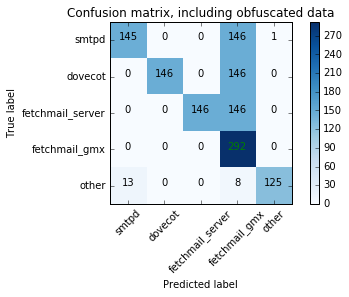

In [38]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['smtpd','dovecot','fetchmail_server','fetchmail_gmx','other'],
                      title='Confusion matrix, including obfuscated data')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['smtpd','dovecot','fetchmail','other'], normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

In [39]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=6, whiten=True).fit(x_train.toarray())
#X_pca = pca.transform(x_train.toarray())
#X_test_pca = pca.transform(x_test.toarray())


In [40]:
#X_test_pca.shape

In [41]:
#clf.fit(X_pca, y_train)
#y_predicted = clf.predict(X_test_pca)

#accuracy_score(y_test, y_predicted)

In [42]:
#from sklearn.metrics import recall_score
#recall_score(y_test, y_predicted, average='weighted')